In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline 

In [2]:
dataset=pd.read_csv('C:/Users/pragati/Desktop/data science/911.csv')
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
dataset.shape

(423909, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [5]:
dataset.describe()

,lat,lng,zip,e
count,423909.000000,423909.000000,371780.000000,423909.0
mean,40.158618,-75.314022,19234.732269,1.0
std,0.129170,0.656048,301.388898,0.0
min,0.000000,-119.698206,3366.000000,1.0
25%,40.099784,-75.391547,19038.000000,1.0
50%,40.143900,-75.304563,19401.000000,1.0
75%,40.229008,-75.210760,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [ ]:
#Questions
##Q 1A) what are top 5 zip code for 911 Call

In [6]:
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
#Q1B) what are Top 5 Township for 911 Call

In [9]:
dataset['twp'].value_counts().head()

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

<AxesSubplot:>

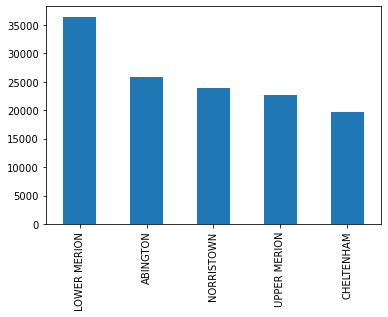

In [10]:
dataset_top5_twp=dataset['twp'].value_counts().head()
dataset_top5_twp.plot.bar()

In [ ]:
#Q1 C how many Unique types of call came and what are top 5

In [12]:
dataset['title'].nunique()

141

In [13]:
dataset['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    98401
Traffic: DISABLED VEHICLE -    31871
Fire: FIRE ALARM               24380
EMS: FALL VICTIM               21253
EMS: RESPIRATORY EMERGENCY     21158
Name: title, dtype: int64

<AxesSubplot:>

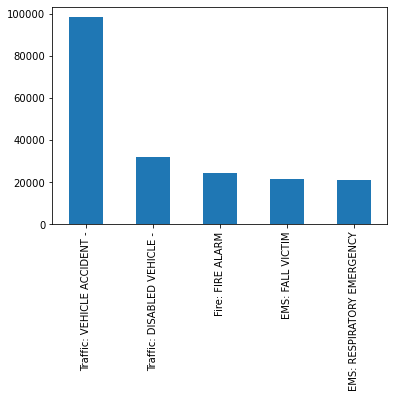

In [14]:
dataset_top5_uniquecalls=dataset['title'].value_counts().head(5)
dataset_top5_uniquecalls.plot.bar()

In [ ]:
#Q 1D ) What is Most common reason for calling 911

In [22]:
dataset["reason"] = dataset["title"].apply(lambda title: title.split()[0])
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:,EMS:
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS:,EMS:
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire:,Fire:
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS:,EMS:
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS:,EMS:


In [23]:
dataset['reason'].value_counts().head()

EMS:        208676
Traffic:    151458
Fire:        63775
Name: reason, dtype: int64

<AxesSubplot:>

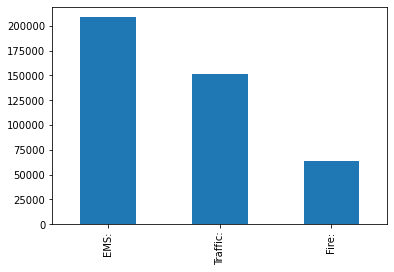

In [25]:
dataset_common_reason_tocall=dataset['reason'].value_counts().head()
dataset_common_reason_tocall.plot.bar()

In [ ]:
#Time Stamp
##Processing Dataset for Time

In [26]:
dataset["timeStamp"] = pd.to_datetime(dataset["timeStamp"])
dataset["Year"] = pd.DatetimeIndex(dataset['timeStamp']).year
dataset["Month"] = pd.DatetimeIndex(dataset["timeStamp"]).month
dataset["Time"] = pd.DatetimeIndex(dataset["timeStamp"]).time
dataset["DayOfWeek"] = pd.DatetimeIndex(dataset["timeStamp"]).dayofweek
dataset["Date"] = pd.DatetimeIndex(dataset["timeStamp"]).date
dataset["DayOfWeek"] = dataset["DayOfWeek"].map({0:'Mon',
                                      1:'Tue',
                                      2:"Wed",
                                      3:"Thur",
                                      4:"Fri",
                                      5:"Sat",
                                      "6":"Sun"})
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,reason,Year,Month,Time,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:,EMS:,2015,12,17:10:52,Thur,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS:,EMS:,2015,12,17:29:21,Thur,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire:,Fire:,2015,12,14:39:21,Thur,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS:,EMS:,2015,12,16:47:36,Thur,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS:,EMS:,2015,12,16:56:52,Thur,2015-12-10


In [29]:
dataset['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
423904   2018-11-16 08:54:08
423905   2018-11-16 08:53:32
423906   2018-11-16 08:54:19
423907   2018-11-16 08:51:48
423908   2018-11-16 08:46:25
Name: timeStamp, Length: 423909, dtype: datetime64[ns]

In [31]:
dataset['Year']

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
423904    2018
423905    2018
423906    2018
423907    2018
423908    2018
Name: Year, Length: 423909, dtype: int64

In [32]:
dataset['DayOfWeek']

0         Thur
1         Thur
2         Thur
3         Thur
4         Thur
          ... 
423904     Fri
423905     Fri
423906     Fri
423907     Fri
423908     Fri
Name: DayOfWeek, Length: 423909, dtype: object

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

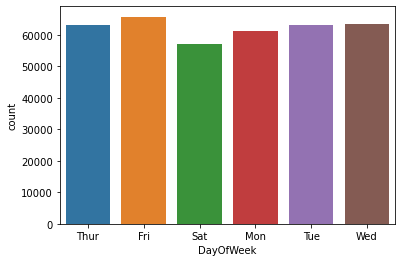

In [34]:
sns.countplot(x="DayOfWeek",data=dataset)

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

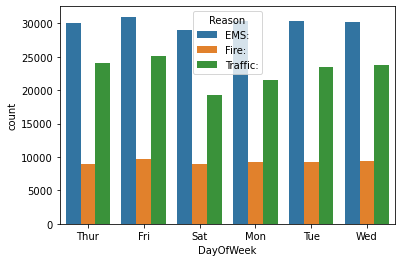

In [35]:
sns.countplot(x="DayOfWeek", data=dataset, hue="Reason")

<AxesSubplot:xlabel='Month', ylabel='count'>

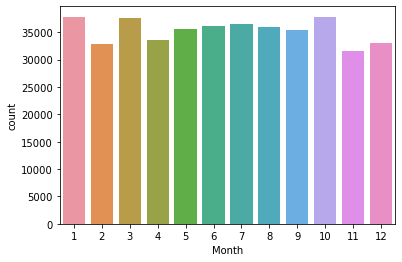

In [36]:
sns.countplot(x="Month",data=dataset)

<AxesSubplot:xlabel='Year', ylabel='count'>

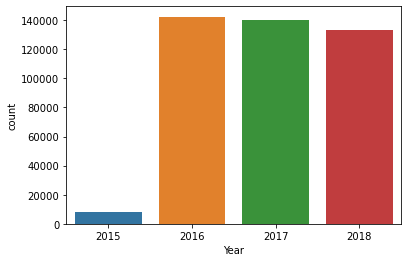

In [37]:
sns.countplot(x="Year",data=dataset)

In [ ]:
#Conclusion: Maximum call for EMS emergency call are on Friday and maximum call were in Month of Jan. March and october and Maximum call was recieved in Year 2016¶
